In [1]:
# Import necessary libraries
import pandas as pd
import torch
import torchvision.transforms as transforms
from skimage import io
from PIL import Image
import random
import matplotlib.pyplot as plt
import seaborn as sns
from utils import path_configs, data_configs, model_configs
from utils.dataset import create_csv
from utils import get_dataloader, get_dataset
from utils import visualize_batch

from models import ResVitModel

%load_ext autoreload
%autoreload 2

In [2]:
trainset, testset = get_dataset()
trainloader, valloader = get_dataloader(trainset, train=True)
testloader = get_dataloader(testset, train=False)

Number of batches in trainset: 91
Shape of each batch (X, Y): torch.Size([4, 3, 256, 256]) torch.Size([4, 3, 256, 256])
Means of each batch (X, Y): tensor(-0.6329) tensor(-0.6354)
Standard deviations of each batch (X, Y): tensor(1.0256) tensor(0.5150)


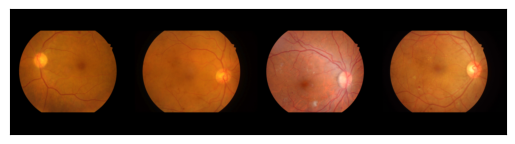

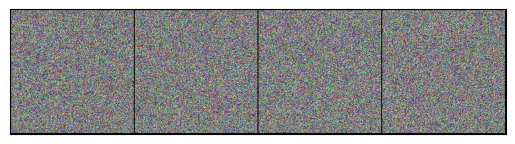

In [3]:
trainbatch = next(iter(trainloader))
noise, images = trainbatch
print("Number of batches in trainset:", len(trainloader))
print("Shape of each batch (X, Y):", noise.shape, images.shape)
print("Means of each batch (X, Y):", noise.mean(), images.mean())
print("Standard deviations of each batch (X, Y):", noise.std(), images.std())

visualize_batch(images.detach().cpu())
visualize_batch(noise.detach().cpu())

In [4]:
model = ResVitModel(model_config=model_configs(), 
                    data_config=data_configs())

---------- Networks initialized -------------


c:\Users\nikhi\Documents\Projects\Transformer-based_Retinal_Image_Synthesis\.virt-env\Lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


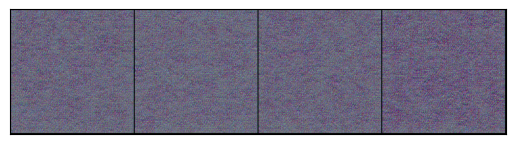

Mean, Std: tensor(-0.1361) tensor(0.3241)


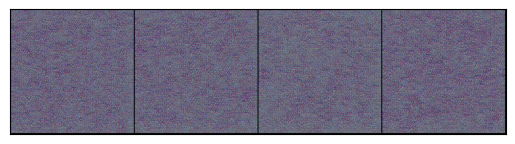

Mean, Std: tensor(-0.1370) tensor(0.3245)


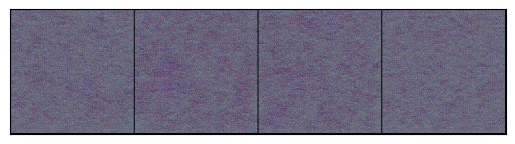

Mean, Std: tensor(-0.1367) tensor(0.3245)


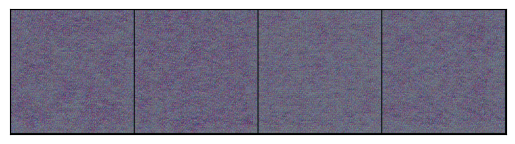

Mean, Std: tensor(-0.1366) tensor(0.3244)


In [5]:
for i, batch in enumerate(trainloader):
    noise, imgs = batch
    out = model(noise).detach().cpu()
    visualize_batch(out)
    print("Mean, Std:", out.mean(), out.std())
    if i==3:
        break

In [6]:
out = model.netD(noise.cuda()).detach().cpu()
print(out, out.shape) 

tensor([[ 0.1279],
        [ 0.0415],
        [-0.0352],
        [ 0.0542]]) torch.Size([4, 1])


In [7]:
model._gradient_penalty(images.cuda(), noise.cuda(), 4)

tensor(11.6661, device='cuda:0', grad_fn=<MulBackward0>)

In [2]:
path_cfg = path_configs()

num_imgs = create_csv(path_cfg.data_path, path_cfg.csv_path)

basic_transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor(),
            transforms.Normalize(0.5,0.5)
        ])

img_paths = pd.read_csv(path_cfg.csv_path, header=0)
imgs = []
for i, img_path in enumerate(img_paths.to_numpy()):
    print(f"Progress: {i}/{num_imgs}", end='\r')
    image = Image.fromarray(io.imread(img_path[0]))
    image = basic_transform(image)
    imgs.append(image)

imgs = torch.stack(imgs)

print(torch.mean(imgs), torch.std(imgs))


CSV file saved at: data\image_paths.csv
tensor(-0.3379) tensor(0.5092)
